* By: Brandon Tan Jun Da
* Email: brandontan.2019@business.smu.edu.sg
* Reference: __Statistical Arbitrage with Vine Copulas__ _by_ Stübinger, Johannes; Mangold, Benedikt; Krauss, Christopher



# Implementation of a Partner Selection Framework

## Abstract

In this paper[1], Stübinger Et al proposes a multivariate statistical arbitrage strategy based on vine copulas. In a study conducted on the universe contained within the S&P500, they have found statistically significant returns of 9.25 percent p.a. and a Sharpe ratio of 1.12. 

The process starts with partner selection, identifying the best quadruples for each given security within S&P500. After which, we undergo a process of model fitting and select the top r target securities to be utilised for actual trading.

## Introduction

This notebook will focus on the implementation of section 3.1.1 - the Parter Selection Framework. It first starts off with a rank transformation on the daily discrete returns of securities. The motivation is to reduce the impact of outliers, given that we only consider the position (ranking) and not the discrete value. Following that, we measure the spearman correlation between securities and select the top 50 most correlated securities for the given security. This bivariate process will greatly speed up computations. 

With the reduced data, the paper outlined 4 methods, namely the traditional, extended, geometric and extremal approach to further identify quadruples.

Concretely, here are the steps:

1. Rank transformation.
2. Selecting the top 50 correlated securities based on target security.
3. Applying the approach of choice to find the best quadruple for target security.


# Demo of Implementation

In [1]:
import pandas as pd
from partner_selector import PartnerSelector

In [2]:
price_data = pd.read_csv('SP500_price.csv',index_col=0)

price_data.sample(5)

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-17,225.426270,61.908195,56.140934,89.680931,224.130005,152.433517,68.987587,196.490005,114.100708,12.180000,...,163.483566,41.919754,28.169128,72.258789,68.403648,78.801781,123.779999,119.599823,49.007740,75.283218
2018-09-27,194.635345,51.505413,70.141708,82.571182,442.890015,163.223633,81.672470,269.910004,168.170563,32.590000,...,122.924149,43.844700,24.372072,77.287460,77.996849,86.798759,178.240005,127.442924,46.866493,89.843987
2019-09-17,160.645721,47.690559,81.625366,66.096069,190.539993,190.398392,54.988350,284.690002,154.757797,30.990000,...,112.046188,61.698601,28.680174,102.309998,77.088600,110.196556,211.000000,137.281677,42.630192,121.378731
2020-10-09,167.848007,56.622910,108.847244,85.521492,273.559998,227.911179,78.209999,502.160004,155.079300,83.099998,...,72.669998,72.231865,19.663063,120.597343,90.332893,95.062569,284.000000,147.751602,31.308722,164.967529
2015-08-10,129.005219,33.225567,45.480286,54.350491,95.570000,95.149376,27.849518,83.620003,171.026794,1.930000,...,93.557564,29.515005,24.215063,39.784767,31.700249,57.122177,110.040001,98.890205,28.280361,46.553509


## Step 1 - Load dataset into Partner Selector

### Partner Selector will automatically apply all relevant data transformations

- Compute daily discrete returns
- Perform rank transformation
- Generate spearman correlation dataframe
- Generate top n potential partners, where n is specified by user. Default, 50.

In [3]:
%%time
ps = PartnerSelector(price_data=price_data,target_ticker='AAPL',no_of_partners=3,top_n_corr=50)

CPU times: user 1.99 s, sys: 34.4 ms, total: 2.02 s
Wall time: 2.05 s


Top n Potential Partners

In [4]:
ps.potential_partners

MSFT     0.601830
SWKS     0.577769
TXN      0.561501
AVGO     0.560683
GOOG     0.560308
GOOGL    0.557499
AMZN     0.543871
SNPS     0.531016
ADBE     0.529464
MA       0.526614
CDNS     0.525788
ANSS     0.523598
QRVO     0.520307
NVDA     0.516770
FB       0.516766
ADI      0.516060
KLAC     0.511313
CSCO     0.506565
V        0.504546
QCOM     0.502189
LRCX     0.501152
MXIM     0.500904
INTU     0.499945
APH      0.497381
CRM      0.496585
AMAT     0.495833
XLNX     0.494904
MCHP     0.493655
INTC     0.491829
TER      0.488822
ACN      0.479149
ISRG     0.478682
ADSK     0.478375
MCO      0.476097
VRSN     0.471442
SPGI     0.467870
MSCI     0.464042
GLW      0.462328
CTSH     0.456698
ORCL     0.456086
TMO      0.455547
IPGP     0.454844
NOW      0.454755
A        0.453624
TEL      0.443048
ATVI     0.440858
BR       0.440038
GPN      0.439570
FTNT     0.438837
IDXX     0.436703
Name: AAPL, dtype: float64

## Step 2 - Select Partners

### Applying the various methods

- Traditional Method
- Extended Approach
- Geometric Approach

In [5]:
best_Q = ps.select(method='traditional')
best_Q

100%|██████████| 19600/19600 [00:17<00:00, 1114.35it/s]


['MSFT', 'GOOG', 'GOOGL', 'AAPL']

In [6]:
best_Q = ps.select(method='extended',estimator=1)
best_Q

100%|██████████| 19600/19600 [00:13<00:00, 1438.38it/s]


['MSFT', 'GOOG', 'GOOGL', 'AAPL']

In [7]:
best_Q = ps.select(method='geometric')
best_Q

100%|██████████| 19600/19600 [12:10<00:00, 26.83it/s]


['MSFT', 'GOOG', 'GOOGL', 'AAPL']

## Partner Selection information

### Allowing the user to obtain some general statistics of the underlying quadruples generated

- print_info and plot_selected_partners are based on the latest select method that was ran.

In [8]:
%%time
ps.print_info()

CPU times: user 1.49 s, sys: 18.2 ms, total: 1.51 s
Wall time: 1.53 s


,Total Euclidean Distance
count,1.960000e+04
mean,4.507172e+08
std,2.910746e+07
min,3.034547e+08
25%,4.333766e+08
50%,4.527654e+08
75%,4.709907e+08
max,5.383677e+08


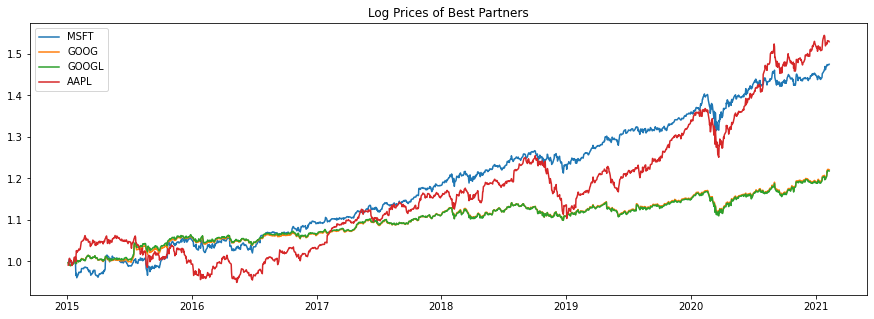

CPU times: user 380 ms, sys: 62.7 ms, total: 443 ms
Wall time: 456 ms


In [9]:
%%time
ps.plot_selected_partners()

## Conclusion

The notebook describes the proposed Partner Selection Framework and also shows example usage of the implementation.

The major take away from my personal investigation is that the first 3 approaches often pick the same quadruples, therefore reinforcing the intuition provided in the paper that "The traditional, the extended, and the geometric approach share a common feature - they measure the deviation from linearity in ranks. All three aim at finding the quadruple that behaves as linearly as possible to ensure that there is an actual relation between its components to model."

# References

1. Stübinger, Johannes; Mangold, Benedikt; Krauss, Christopher (2016) : Statistical arbitrage with vine copulas, FAU Discussion Papers in Economics, No. 11/2016, Friedrich-Alexander-Universität Erlangen-Nürnberg, Institute for Economics, Nürnberg. Available at: https://www.econstor.eu/bitstream/10419/147450/1/870932616.pdf